In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import matplotlib.animation as animation
import numpy as np
from contpy import optimize

<IPython.core.display.Javascript object>


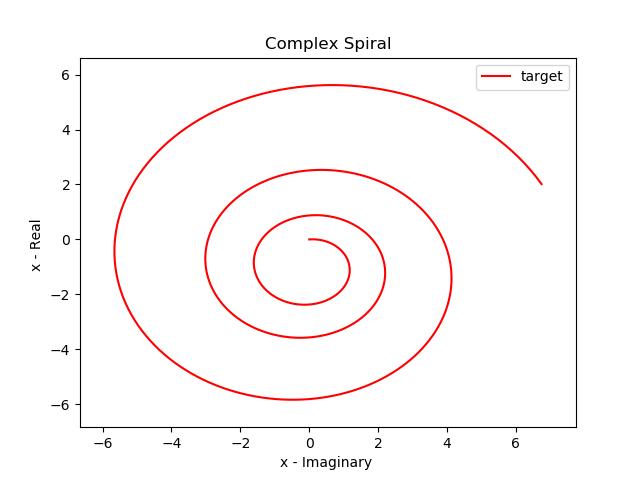

In [2]:
# Defining a Residual Equation for R(x,p) for the spiral
a1 = 0.2
w = 2      
complex_spiral = lambda p : - 1 + np.exp(1J*w*p + a1*p)
R = lambda x, p : x - complex_spiral(p)

fig1, ax1 = plt.subplots(1)
p_list = np.linspace(0,10,500)
x_list = np.array(list(map(complex_spiral,p_list)))
def init():    
    x_min,x_max = x_list.imag.min() - 1 ,x_list.imag.max() + 1
    y_min,y_max = x_list.real.min() - 1,x_list.real.max() + 1
    ax1.set_xlabel('x - Imaginary ')
    ax1.set_ylabel('x - Real ')
    ax1.set_title('Complex Spiral')
    ax1.set_xlim((x_min,x_max))
    ax1.set_ylim((y_min,y_max))
    ax1.plot(x_list.imag[0],x_list.real[0],'r-',label='target')
    ax1.legend()   
    return ax1
    
def update(i): 
    ax1.plot(x_list.imag[:i],x_list.real[:i],'r-')
    
        
ax1 = init()
update(len(p_list))  

#ani = FuncAnimation(fig1, update, frames=np.arange(1, len(p_list) ,1 ), init_func= init, blit=True, interval=1, repeat=False)   

In [3]:
# computing Analytical jacobian
JRx = lambda p : lambda x :  np.array([[1.0 + 1J*0]])
JRp = lambda x : lambda p :  np.array([[-np.exp(1J*w*p + a1*p)*(1J*w + a1)]])

# computing numerical jacobian
JRp_num = lambda x : optimize.real_jacobian(lambda p : R(x,p))
JRx_num = lambda p : optimize.complex_jacobian(lambda x : R(x,p))

In [4]:
# Check error between analytical and numerical derivative in terms of x
xn = np.array([0 + 1J*1])
pn = 1
J_ana_eval = JRx(pn)(xn)
J_num_eval = JRx_num(pn)(xn)

error_norm = np.linalg.norm((J_ana_eval - J_num_eval).flatten())
print('Error norm between numerical and analytical Jacobian in x =  %e' %error_norm)

Error norm between numerical and analytical Jacobian in x =  2.220446e-16


In [5]:
# Check error between analytical and numerical derivative in terms of p
Jp_ana_eval = JRp(xn)(pn)
Jp_num_eval = JRp_num(xn)(pn)

error_norm = np.linalg.norm((Jp_ana_eval - Jp_num_eval).flatten())
print('Error norm between numerical and analytical Jacobian in p = %e' %error_norm)

Error norm between numerical and analytical Jacobian in p = 2.246933e-14


In [6]:
%%time
# continuation with numerical Jacobian
x0=np.array([0.0],dtype=np.complex)
x_sol, p_sol, info_dict = optimize.continuation(R,x0=x0, correction_method='matcont',jacx=JRx_num, jacp=JRp_num,
                                                p_range=(-10.0,10.0),p0=0.0,max_dp=0.01,step=0.1,max_int=5000)

Continuation algorithm has reached the limits of parameter range
Wall time: 40.3 s


<IPython.core.display.Javascript object>


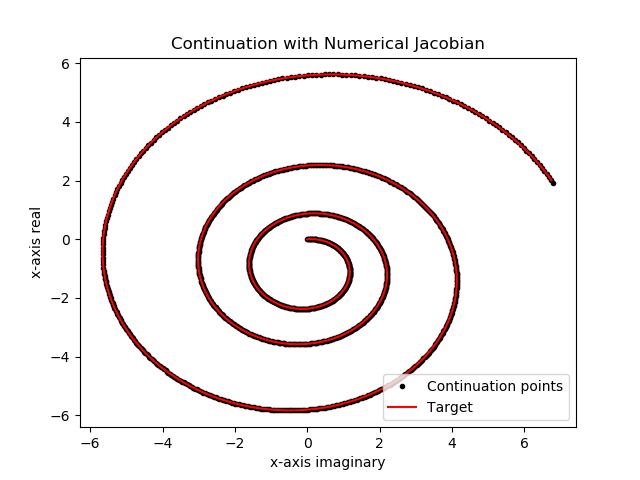

In [7]:
# ploting continuation curve with numerical jacobian
fig2, ax2 = plt.subplots(1)
ax2.plot(x_sol[0,:].imag,x_sol[0,:].real,'k.',label='Continuation points')
ax2.plot(x_list.imag,x_list.real,'r-',label='Target')
ax2.set_xlabel('x-axis imaginary')
ax2.set_ylabel('x-axis real')
ax2.set_title('Continuation with Numerical Jacobian')
ax2.legend()

In [8]:
%%time
# continuation with analytical Jacobian
x_sol, p_sol, info_dict = optimize.continuation(R,x0=x0,correction_method='matcont',jacx=JRx,jacp=JRp,
                                                p_range=(0.0,10.0),p0=0.0,max_dp=0.1,step=0.1,max_int=5000)

Continuation algorithm has reached the limits of parameter range
Wall time: 1.62 s


<IPython.core.display.Javascript object>


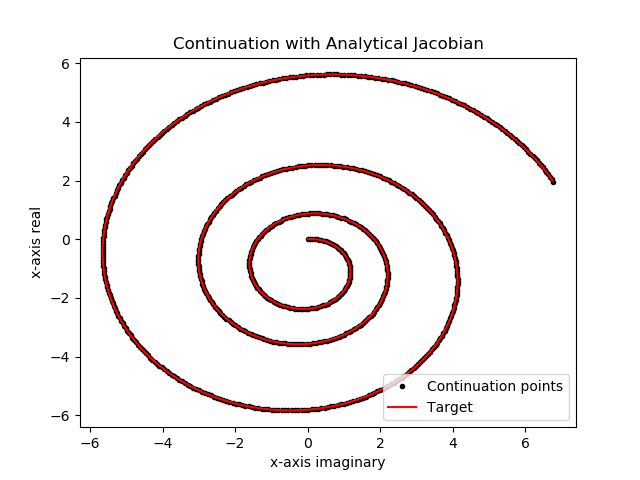

In [9]:
# ploting continuation curve with numerical jacobian
fig3, ax3 = plt.subplots(1)
ax3.plot(x_sol[0,:].imag,x_sol[0,:].real,'k.',label='Continuation points')
ax3.plot(x_list.imag,x_list.real,'r-',label='Target')
ax3.set_xlabel('x-axis imaginary')
ax3.set_ylabel('x-axis real')
ax3.set_title('Continuation with Analytical Jacobian')
ax3.legend()